# K-Means Clustering

### Objective: 
**From the given dataset, find the optimal number of cluster and represent it visually**

### Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
import klib
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

### Loading the iris dataset

In [2]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris=df.drop('species',axis=1)
display(iris.head())
iris.shape

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


(150, 4)

**Dataset dimension**

In [4]:
iris.shape

(150, 4)

**Data Types**

In [5]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**Summary statistics**

In [7]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


**Univariate Analysis**

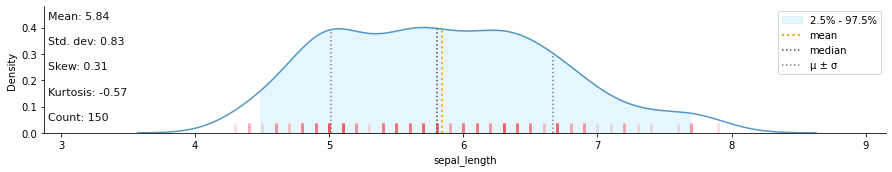

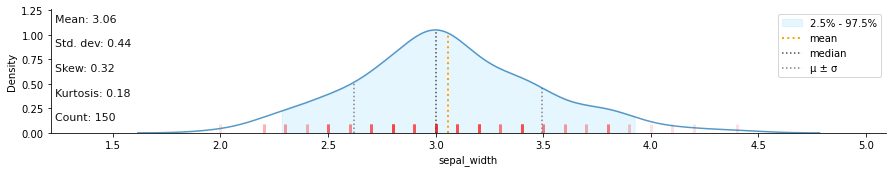

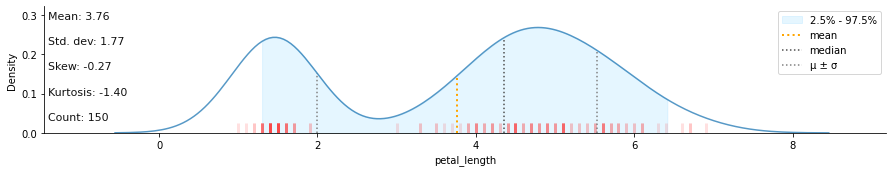

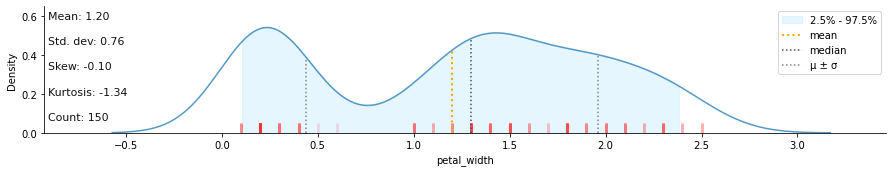

In [8]:
klib.dist_plot(iris)
plt.show()

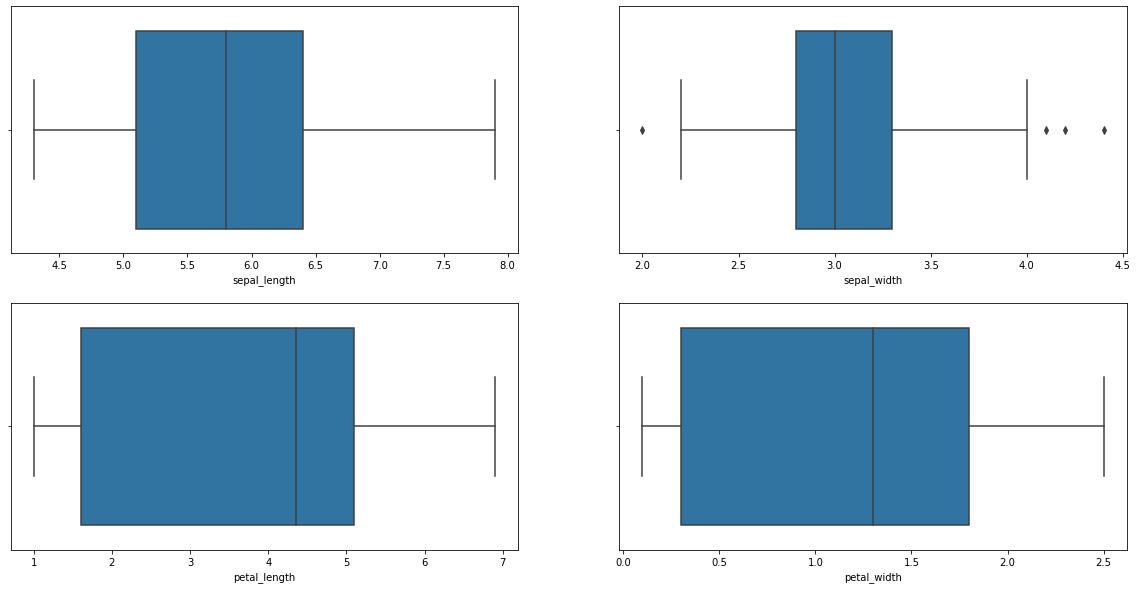

In [9]:
fig,ax=plt.subplots(2,2,figsize=(20,10))
for col,subplot in zip(iris.columns,ax.flatten()):
    sns.boxplot(iris[col],ax=subplot)
plt.show()

**Bivariate Analysis**

In [10]:
#Heatmap to check the correlation between the variables

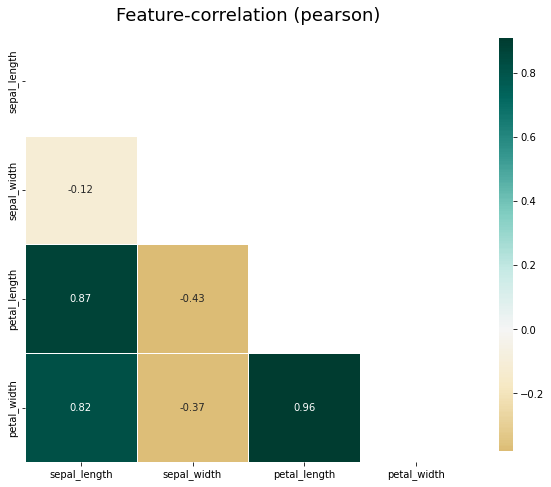

In [11]:
klib.corr_plot(iris,figsize=(10,8))
plt.show()

> petal_length is highly correlated with petal_width <p/>
> sepal_length is positively correlated with petal_width and petal_length<p/>
> sepal_width is negatively correlated with petal_width and petal_length

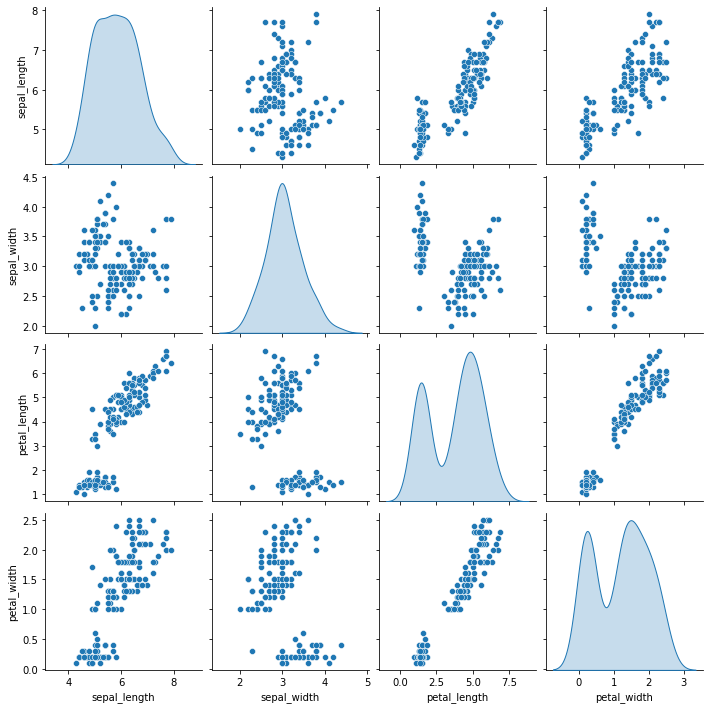

In [12]:
#Lets visualize this data using pairplot(scatterplots)
sns.pairplot(iris,diag_kind='kde')

#### Finding the Optimal number of clusters for K-Means using elbow plot

In [53]:
cluster_range = range( 1, 12 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(n_clusters=num_clusters)
    clusters.fit(iris)
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,1,777.530600
1,2,247.631749
2,3,78.851441
3,4,59.348766
4,5,46.985061
5,6,42.696482
6,7,35.168699
7,8,31.045276
8,9,29.087833
9,10,26.823865


**Elbow plot**

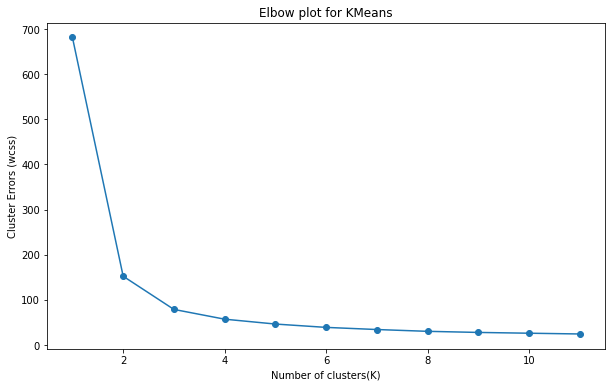

In [14]:
plt.figure(figsize=(10,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title('Elbow plot for KMeans')
plt.xlabel('Number of clusters(K)')
plt.ylabel('Cluster Errors (wcss)')
plt.show()

### From the Elbow plot we can see that at K=3 the inertia stops to drop significantly. 

In [54]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(iris)

KMeans(n_clusters=3, random_state=0)

In [55]:
iris['kmeans_labels']=kmeans.labels_

In [56]:
iris['kmeans_labels'].value_counts()

1    62
0    50
2    38
Name: kmeans_labels, dtype: int64

**We can see that clusters are labeled as 0,1,2**

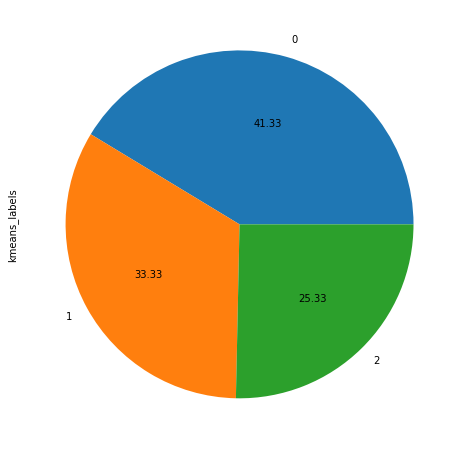

In [18]:
iris['kmeans_labels'].value_counts().plot(kind='pie',autopct='%.2f',figsize=(10,8))
plt.show()

### Visualizing Clusters

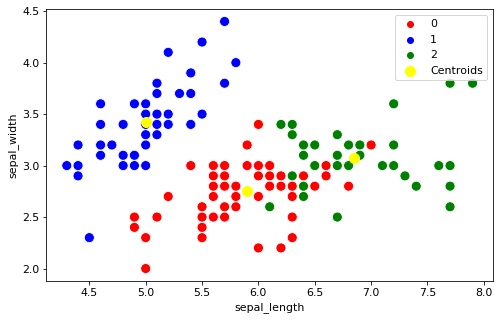

In [50]:
#lets visualize the clusters 
plt.figure(figsize=(8,5))
sns.scatterplot(x='sepal_length',y='sepal_width',hue='kmeans_labels',data=iris,palette=['red','blue','green'],s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

**Pair Plot**

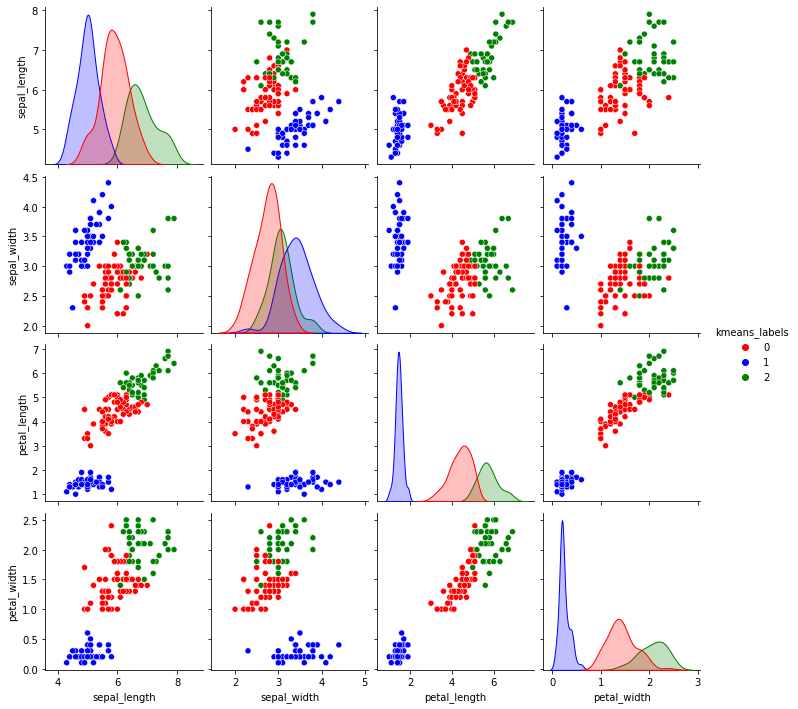

In [20]:
sns.pairplot(iris,hue='kmeans_labels',palette=['red','blue','green'])
plt.show()

**Distribution Plots for different clusters**

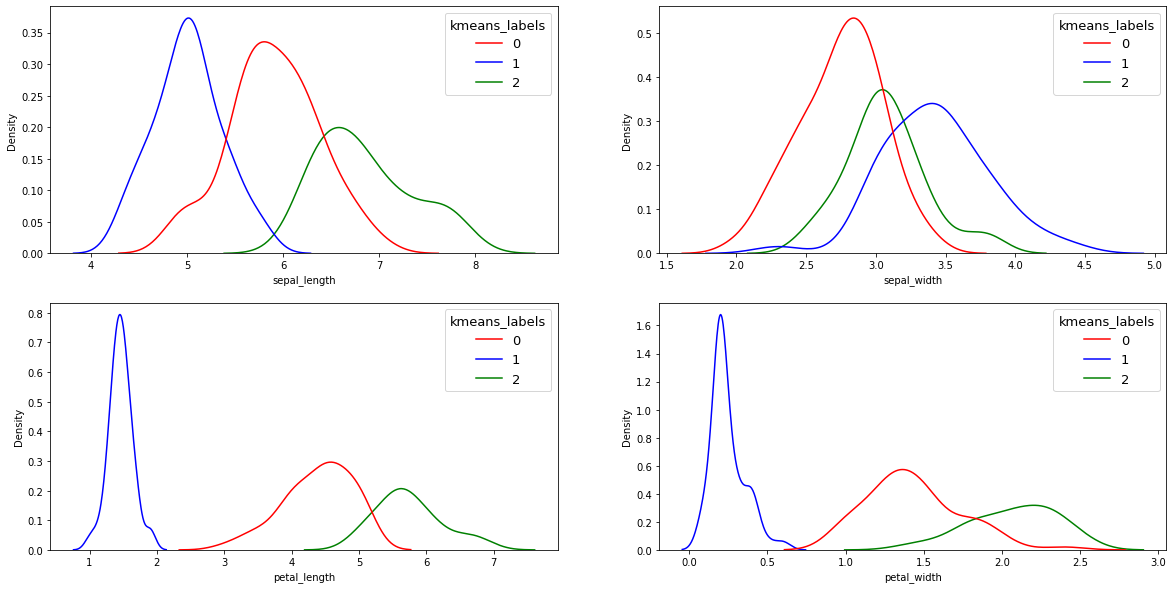

In [32]:
fig,ax=plt.subplots(2,2,figsize=(20,10))
plt.rcParams.update({'font.size': 13})
for col,subplot in zip(iris.columns,ax.flatten()):
    sns.kdeplot(x=col,hue='kmeans_labels',data=iris,palette=['red','blue','green'],ax=subplot)
plt.show()

**BarPlots for different clusters**

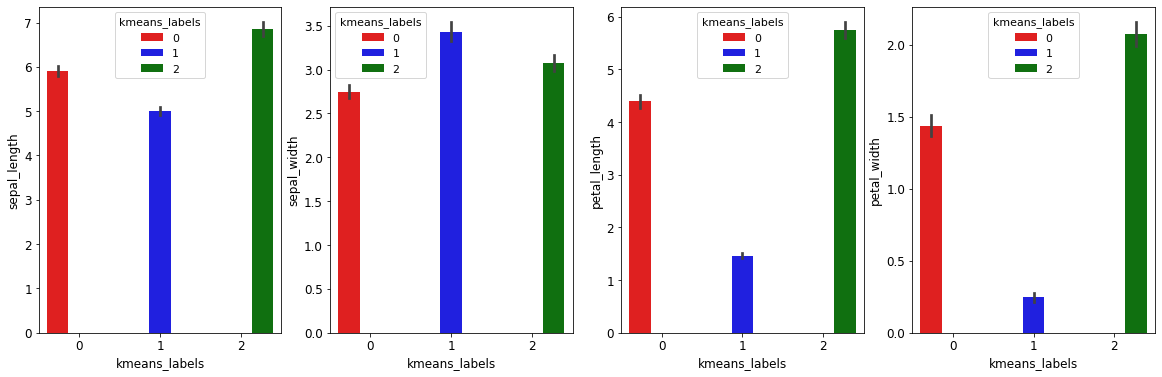

In [40]:
fig,ax=plt.subplots(1,4,figsize=(20,6))
plt.rcParams.update({'font.size': 11})
for col,subplot in zip(iris.columns,ax.flatten()):
    sns.barplot(y=col,x='kmeans_labels',hue='kmeans_labels',data=iris,palette=['red','blue','green'],ax=subplot)
plt.show()